# Keras 基本介紹
[keras](https://keras.io/) 為基於[theano](http://deeplearning.net/software/theano/), [tensorflow](https://www.tensorflow.org/)上的深度學習工具包，比起前面兩者，語法上較為高階與方便使用，亦可以與原生(`tf/th`)的`API`做深度結合。

本文利用`keras`來試作迴歸問題(linear regression)

$ y = Sin(x) + 0.5x + \epsilon$

### 數據生成

In [1]:
import numpy as np  # 為一科學運算套件 tensorflow,theano只吃numpy的數據結構(N-d array)
np.random.seed(0) # 使結果有可重現性
import pandas as pd # dataframe套件
import matplotlib.pyplot as plt # 繪圖工具
%matplotlib inline

In [2]:
x = np.linspace(-10,10,200)
np.random.shuffle(x) 
rand = np.random.randn(len(x))
y = np.sin(x) +0.5*x +0.2*rand

In [3]:
print('x 的數據型別:{}'.format(x.dtype))
print('y 的數據型別:{}'.format(y.dtype))

x 的數據型別:float64
y 的數據型別:float64


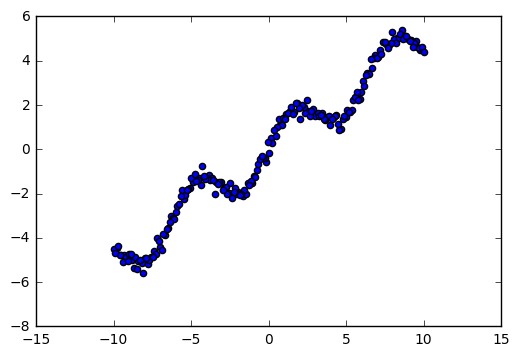

In [4]:
plt.scatter(x,y)

In [5]:
df = pd.DataFrame({'x':x,'y':y})
df.head(10)

,x,y
0,-8.190955,-5.137030
1,7.085427,4.185645
2,0.753769,1.113223
3,-0.150754,-0.561830
4,7.788945,4.708999
5,8.291457,5.027708
6,-9.497487,-4.765354
7,4.673367,0.908774
8,-8.793970,-4.984775
9,5.276382,1.681419


_________________

### 讀出資料

In [28]:
import pymssql 
import sqlalchemy 

In [29]:
connect_r = lambda x:pymssql.connect('dbm_public','sa','01060728','test')
conn_r = sqlalchemy.create_engine('mssql+pymssql://',creator=connect_r)

In [31]:
df_read = pd.read_sql(u'select * from ihong_keras測試' ,conn_r)
df_read

,x,y,ypred
0,-8.190955,-5.137030,-4.526120
1,7.085427,4.185645,3.777802
2,0.753769,1.113223,1.187456
3,-0.150754,-0.561830,-0.148695
4,7.788945,4.708999,4.303621
5,8.291457,5.027708,4.679207
6,-9.497487,-4.765354,-5.234628
7,4.673367,0.908774,1.910946
8,-8.793970,-4.984775,-4.853124
9,5.276382,1.681419,2.379892


In [34]:
x = df_read['x'].values # 轉換成numpy array格式
y = df_read['y'].values #

### 切出訓練 / 測試資料

In [6]:
x_train,y_train = x[:160],y[:160]
x_test,y_test = x[-40:],y[-40:]

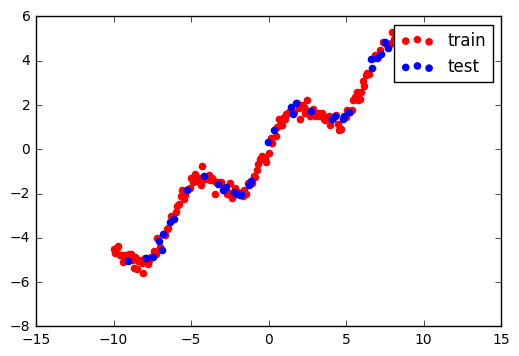

In [7]:
plt.scatter(x_train,y_train,color='r',label='train')
plt.scatter(x_test,y_test,color='b',label='test')
plt.legend()

### 模型建立
建立 1x60x60x1 的Feed-Forward神經元模型

In [8]:
from keras.models import Sequential 
from keras.layers.core import Dense
from keras.optimizers import SGD

Using Theano backend.


In [9]:
def base_model():
    # to build fully-connected nn model
    model = Sequential()
    model.add(Dense(output_dim=60 , input_dim=1,activation='relu'))
    model.add(Dense(output_dim=60,activation='relu'))
    model.add(Dense(output_dim=1))
    return model

### 模型訓練

In [10]:
model = base_model()
model.compile(loss = 'mse',optimizer='sgd',metrics=['accuracy'])

In [11]:
%time model.fit(x_train,y_train,nb_epoch=1000,batch_size=20,verbose=0)

Wall time: 21.9 s


### 預測

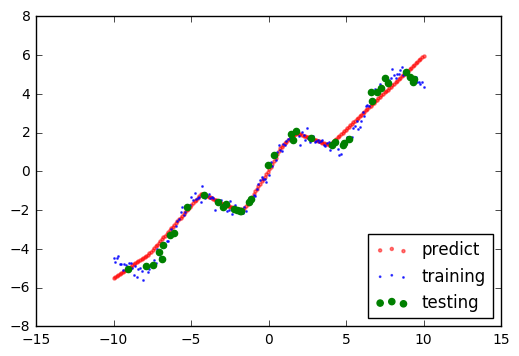

In [12]:
y_pred = model.predict(x)
plt.scatter(x,y_pred,color = 'r',s=5 ,alpha=0.5,label='predict')
plt.scatter(x,y,color='b',alpha = 0.7, s=1 ,label='training')
plt.scatter(x_test,y_test,color = 'g', marker='o',label='testing')
plt.legend(loc=4)

In [13]:
df['ypred'] = y_pred
df.head()

,x,y,ypred
0,-8.190955,-5.137030,-4.526120
1,7.085427,4.185645,3.777802
2,0.753769,1.113223,1.187456
3,-0.150754,-0.561830,-0.148695
4,7.788945,4.708999,4.303621


### 寫入資料

In [15]:
import pyodbc
import sqlalchemy
connect_w = lambda x:pyodbc.connect('DRIVER={SQL Server};SERVER=dbm_public;DATABASE=test;PWD=01060728;CHARSET=utf8;',
                                     unicode_result=True)
conn_w = sqlalchemy.create_engine('mssql://',creator=connect_w).connect()

C:\Anaconda2\lib\site-packages\sqlalchemy\connectors\pyodbc.py:82: SAWarning: No driver name specified; this is expected by PyODBC when using DSN-less connections
  "No driver name specified; "


In [27]:
df.dtypes

x        float64
y        float64
ypred    float32
dtype: object

In [17]:
df.to_sql(u'ihong_keras測試',conn_w,if_exists='replace',index=False) # 存入db, 不指定資料型態